# By: Dr. Kesselly Kamara

# Install and import packages to manipulate data

In [1]:
from platform import python_version
print(python_version())

3.11.7


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [3]:
data=pd.read_csv("med.csv")

In [4]:
df=data[["Initial_days", "TotalCharge", "Doc_visits"]]
df.columns

Index(['Initial_days', 'TotalCharge', 'Doc_visits'], dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df, columns = df.columns)
df_scaled.head()

,Initial_days,TotalCharge,Doc_visits
0,10.585770,3726.702860,6
1,15.129562,4193.190458,4
2,4.772177,2434.234222,4
3,1.714879,2127.830423,4
4,1.254807,2113.073274,5


In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [8]:
ward_mat= linkage(df_scaled[["Initial_days", "TotalCharge", "Doc_visits"]], method='ward', metric='euclidean')

In [9]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

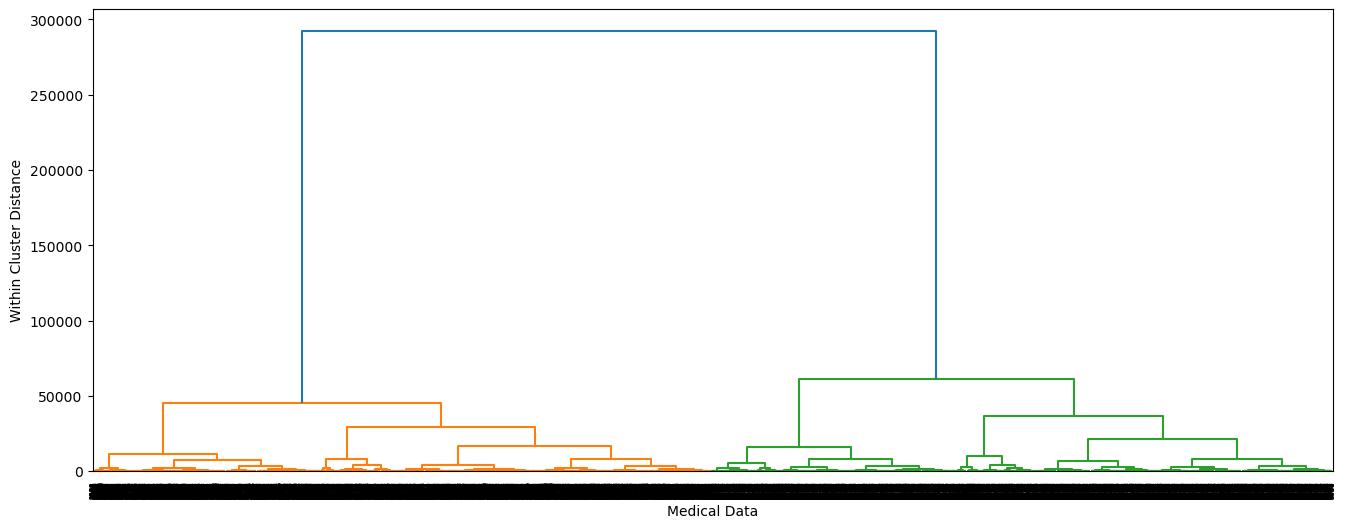

In [10]:
plt.figure(figsize=[16,6])
dendrogram_ward=dendrogram(ward_mat)
plt.xlabel("Medical Data")
plt.ylabel("Within Cluster Distance")
plt.show()

In [11]:
df_scaled['ward_cluster_labels']=fcluster(ward_mat, 2, criterion='maxclust')
print(df_scaled['ward_cluster_labels'].value_counts().sort_index())

ward_cluster_labels
1    4988
2    5012
Name: count, dtype: int64


In [13]:
from sklearn.metrics import silhouette_score
X=df_scaled[["Initial_days", "TotalCharge", "Doc_visits"]]
Y=df_scaled['ward_cluster_labels']
silhouette_score=silhouette_score(X, Y)
print(f"The silhouette score for the hierarchical clustering model calculated as: {silhouette_score}")

The silhouette score for the hierarchical clustering model calculated as: 0.7958046490811059


# By: Dr. Kesselly Kamara  